In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


C:\Users\piyush\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
buil_owner=pd.read_csv('Building_Ownership_Use.csv')
structure=pd.read_csv('Building_Structure.csv')

In [3]:
train

,area_assesed,building_id,damage_grade,district_id,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,has_repair_started,vdcmun_id
0,Both,24385bfd2a2,Grade 4,24,0.0,0,0,0,0,0,0,0,0.0,2489
1,Both,405d1bbebbf,Grade 2,44,0.0,0,0,0,0,0,0,0,1.0,4423
2,Both,351d9bc71f6,Grade 1,36,0.0,0,0,0,0,0,0,0,0.0,3650
3,Building removed,2be3a971166,Grade 5,30,0.0,0,0,0,0,0,0,0,0.0,3016
4,Both,34c7d073ea6,Grade 3,36,0.0,0,0,0,0,0,0,0,0.0,3627
5,Exterior,1f54965821f,Grade 5,21,0.0,0,0,0,0,0,0,0,0.0,2153
6,Both,2beb42eaeee,Grade 2,30,1.0,0,0,0,1,0,0,1,0.0,3018
7,Both,25e8adfd09a,Grade 5,26,0.0,0,0,0,0,0,0,0,0.0,2605
8,Both,1e96b58fa58,Grade 1,21,0.0,0,0,0,0,0,0,0,NaN,2102
9,Both,392cbd772c9,Grade 3,39,0.0,0,0,0,0,0,0,0,1.0,3929


In [4]:
train.area_assesed.unique()

array(['Both', 'Building removed', 'Exterior', 'Not able to inspect',
       'Interior'], dtype=object)

In [5]:
buil_owner

,building_id,district_id,vdcmun_id,ward_id,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,a3380c4f75,7,701,70102,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
1,a3380c4fd9,7,701,70102,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
2,a3380c503e,7,701,70102,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
3,a338a4e5f2,7,701,70103,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
4,a338a4e653,7,701,70103,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
5,a338a4e6b7,7,701,70103,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
6,a338a4e71f,7,701,70103,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
7,a339d612f3,7,701,70105,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
8,a339d61353,7,701,70105,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
9,a339d613bb,7,701,70105,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0


In [6]:
structure

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,...,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq
0,a3380c4f75,7,701,70102,1,1,28,454,9,9,...,0,0,0,0,1,1,0,0,1,Damaged-Repaired and used
1,a3380c4fd9,7,701,70102,1,1,32,324,9,9,...,0,0,0,0,1,1,0,0,1,Damaged-Repaired and used
2,a3380c503e,7,701,70102,2,2,34,456,18,18,...,0,0,0,0,1,1,0,0,1,Damaged-Repaired and used
3,a338a4e5f2,7,701,70103,2,2,20,452,18,18,...,0,0,0,0,1,1,0,0,1,Damaged-Repaired and used
4,a338a4e653,7,701,70103,1,0,25,542,9,0,...,0,0,0,0,1,1,0,0,1,Damaged-Rubble unclear
5,a338a4e6b7,7,701,70103,2,0,35,589,18,0,...,0,0,0,0,1,1,0,0,0,Damaged-Rubble Clear-New building built
6,a338a4e71f,7,701,70103,1,1,44,546,9,9,...,0,0,0,0,1,1,0,0,0,Damaged-Not used
7,a339d612f3,7,701,70105,1,1,25,324,9,9,...,0,0,0,0,1,1,0,0,1,Damaged-Not used
8,a339d61353,7,701,70105,2,0,24,548,18,0,...,1,0,0,0,1,1,0,0,0,Damaged-Rubble clear
9,a339d613bb,7,701,70105,2,0,27,574,18,0,...,1,0,0,0,1,1,0,0,1,Damaged-Rubble clear


In [7]:
buil_owner.has_secondary_use_other.unique()

array([0, 1], dtype=int64)

In [8]:
train.shape

(631761, 14)

In [9]:
buil_owner.shape


(1052948, 17)

In [10]:
structure.shape

(1052948, 29)

In [11]:
structure.ward_id.unique()

array([ 70102,  70103,  70105, ..., 366707, 366708, 366709], dtype=int64)

In [12]:
structure.district_id.unique()

array([ 7,  9, 10, 11, 13, 35, 37, 38, 39, 40, 43, 44, 45, 46, 47, 48, 51,
       26, 27, 25, 12, 20, 21, 22, 23, 24, 28, 29, 30, 31, 36], dtype=int64)

In [13]:
structure.count_floors_post_eq.unique()

array([1, 2, 0, 3, 5, 4, 6, 8, 7, 9], dtype=int64)

In [14]:
from sklearn.preprocessing import LabelEncoder


In [15]:
structure

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,...,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq
0,a3380c4f75,7,701,70102,1,1,28,454,9,9,...,0,0,0,0,1,1,0,0,1,Damaged-Repaired and used
1,a3380c4fd9,7,701,70102,1,1,32,324,9,9,...,0,0,0,0,1,1,0,0,1,Damaged-Repaired and used
2,a3380c503e,7,701,70102,2,2,34,456,18,18,...,0,0,0,0,1,1,0,0,1,Damaged-Repaired and used
3,a338a4e5f2,7,701,70103,2,2,20,452,18,18,...,0,0,0,0,1,1,0,0,1,Damaged-Repaired and used
4,a338a4e653,7,701,70103,1,0,25,542,9,0,...,0,0,0,0,1,1,0,0,1,Damaged-Rubble unclear
5,a338a4e6b7,7,701,70103,2,0,35,589,18,0,...,0,0,0,0,1,1,0,0,0,Damaged-Rubble Clear-New building built
6,a338a4e71f,7,701,70103,1,1,44,546,9,9,...,0,0,0,0,1,1,0,0,0,Damaged-Not used
7,a339d612f3,7,701,70105,1,1,25,324,9,9,...,0,0,0,0,1,1,0,0,1,Damaged-Not used
8,a339d61353,7,701,70105,2,0,24,548,18,0,...,1,0,0,0,1,1,0,0,0,Damaged-Rubble clear
9,a339d613bb,7,701,70105,2,0,27,574,18,0,...,1,0,0,0,1,1,0,0,1,Damaged-Rubble clear


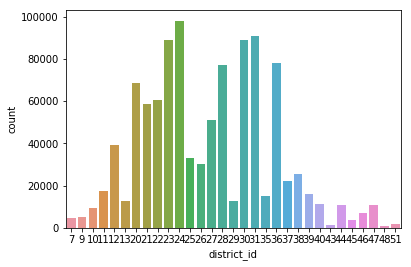

In [16]:
sns.countplot(x=structure.district_id)

In [17]:
structure['district_id']=LabelEncoder().fit_transform(structure['district_id'])


In [18]:
structure.district_id.describe()

count    1.052948e+06
mean     1.267452e+01
std      5.798087e+00
min      0.000000e+00
25%      8.000000e+00
50%      1.200000e+01
75%      1.700000e+01
max      3.000000e+01
Name: district_id, dtype: float64

In [19]:
structure.vdcmun_id.isnull().sum()

0

In [20]:
structure.vdcmun_id.value_counts()

3120    16401
2025     9681
2731     8738
2603     8175
3650     7901
2204     7124
2808     6930
2465     6776
2718     6737
2704     6414
2527     6310
2703     6032
2605     5749
2601     5310
3140     4761
3129     4644
2406     4494
2537     4409
2509     4389
3740     4362
2746     4315
2519     4251
3035     4204
3118     4197
2606     4118
3134     4067
3104     4034
2607     3830
2733     3758
2706     3741
        ...  
4645        5
4508        5
4813        5
4855        4
4536        4
5105        4
5104        4
4831        4
4845        3
4532        3
4838        3
4315        3
5106        3
4859        3
4864        3
4327        2
4320        2
4868        2
907         2
4823        2
4863        2
4520        1
4871        1
4867        1
4812        1
4822        1
4834        1
4846        1
4853        1
4858        1
Name: vdcmun_id, Length: 1428, dtype: int64

In [21]:
structure.columns.tolist()

['building_id',
 'district_id',
 'vdcmun_id',
 'ward_id',
 'count_floors_pre_eq',
 'count_floors_post_eq',
 'age_building',
 'plinth_area_sq_ft',
 'height_ft_pre_eq',
 'height_ft_post_eq',
 'land_surface_condition',
 'foundation_type',
 'roof_type',
 'ground_floor_type',
 'other_floor_type',
 'position',
 'plan_configuration',
 'has_superstructure_adobe_mud',
 'has_superstructure_mud_mortar_stone',
 'has_superstructure_stone_flag',
 'has_superstructure_cement_mortar_stone',
 'has_superstructure_mud_mortar_brick',
 'has_superstructure_cement_mortar_brick',
 'has_superstructure_timber',
 'has_superstructure_bamboo',
 'has_superstructure_rc_non_engineered',
 'has_superstructure_rc_engineered',
 'has_superstructure_other',
 'condition_post_eq']

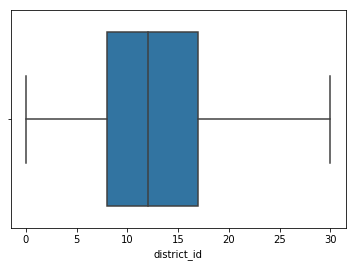

In [22]:
sns.boxplot(x=structure.district_id)

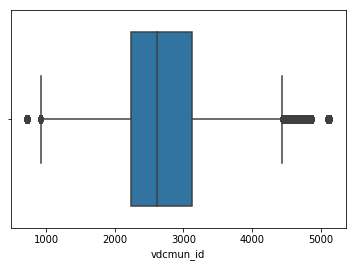

In [23]:
sns.boxplot(x=structure.vdcmun_id)

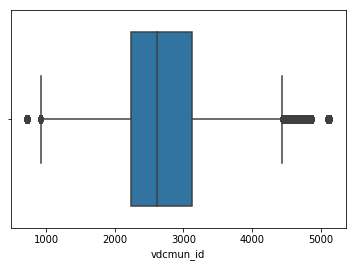

In [24]:
sns.boxplot(x=structure.vdcmun_id)

In [25]:
structure['vdcmun_id']=LabelEncoder().fit_transform(structure['vdcmun_id'])

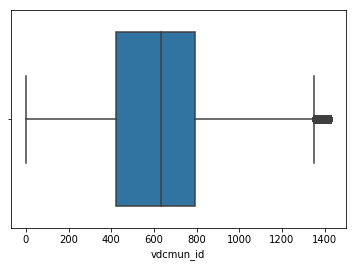

In [26]:
sns.boxplot(x=structure.vdcmun_id)

In [27]:
structure.ward_id.isnull().sum()

0

In [28]:
structure.ward_id.unique()

array([ 70102,  70103,  70105, ..., 366707, 366708, 366709], dtype=int64)

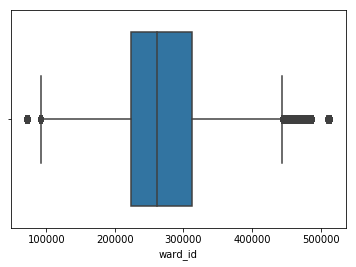

In [29]:
sns.boxplot(x=structure.ward_id)

In [30]:
wardlist=structure['ward_id']<500000

In [31]:
wardlist.value_counts()

True     1051300
False       1648
Name: ward_id, dtype: int64

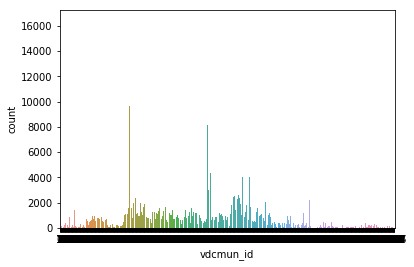

In [32]:
sns.countplot(x=structure.vdcmun_id)

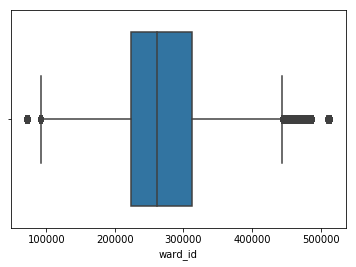

In [33]:
sns.boxplot(x=structure.ward_id)

In [34]:
structure['ward_id']=LabelEncoder().fit_transform(structure['ward_id'])

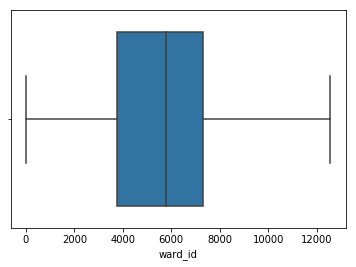

In [35]:
sns.boxplot(x=structure.ward_id)

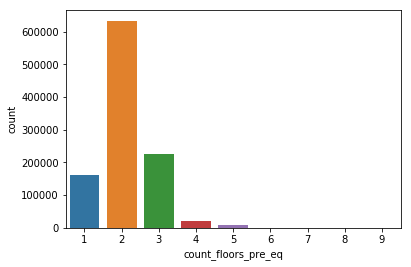

In [36]:
sns.countplot(x=structure.count_floors_pre_eq)

In [37]:
structure.count_floors_pre_eq.unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [38]:
structure.loc[structure.count_floors_pre_eq>5,'count_floors_pre_eq']=5

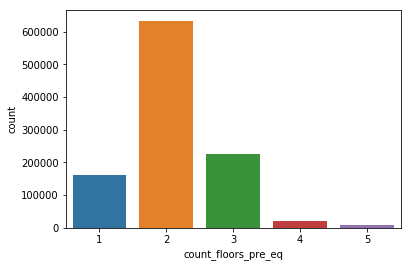

In [39]:
sns.countplot(x=structure.count_floors_pre_eq)

In [40]:
ninth=structure.count_floors_pre_eq==6


In [41]:
structure.loc[structure.count_floors_post_eq>5  ,'count_floors_post_eq']=5

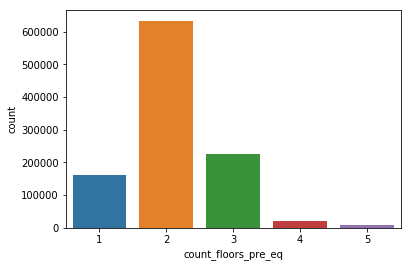

In [42]:
sns.countplot(x=structure.count_floors_pre_eq)

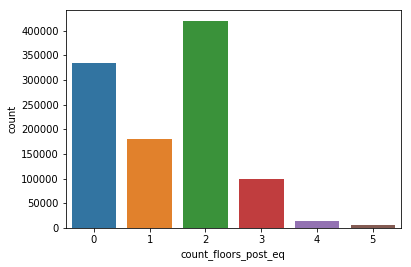

In [43]:
sns.countplot(x=structure.count_floors_post_eq)

In [44]:
structure.count_floors_post_eq.describe()

count    1.052948e+06
mean     1.334691e+00
std      1.093702e+00
min      0.000000e+00
25%      0.000000e+00
50%      2.000000e+00
75%      2.000000e+00
max      5.000000e+00
Name: count_floors_post_eq, dtype: float64

In [45]:
structure.age_building.describe()

count    1.052948e+06
mean     2.775532e+01
std      7.272758e+01
min      0.000000e+00
25%      1.000000e+01
50%      1.800000e+01
75%      3.000000e+01
max      9.990000e+02
Name: age_building, dtype: float64

In [46]:
structure.age_building.isnull().sum()

0

In [47]:
structure.age_building.unique()

array([ 28,  32,  34,  20,  25,  35,  44,  24,  27,  23,  22,  26,   8,
        10,  15,  36,  21,  55,  30,  33,  13,   5,   3,  40,  45,  88,
        18,  17,  49,  16,  12,  80,  38,  19,   9,  37,  39,   2,  29,
        50,  42,  47,   6,  31,  70,  95,  73,  60,  61,  53,  85,  56,
        83,  43,  66,  14, 100,   4,   7,  11,  48,  68, 125,  63,  52,
        90,  81,  78,  65,  41,  59,  51,  46,  58,  64,  62,  82,   1,
        77,  67,  57, 110,  76,  74,  54,  71, 120,  72,  75, 105, 188,
       200,  94,  69,  79,  92, 999, 101, 150, 102,  84,  89,  86,  93,
        97,   0,  99,  87, 113, 157, 118,  98, 103, 112, 130, 108, 198,
        91, 180, 162, 160, 140, 109, 154, 176, 174, 181, 121, 152,  96,
       111, 115, 190, 161, 173, 104, 116, 141, 126, 149, 153, 155, 151,
       114, 199, 138, 145, 170, 135, 107, 165, 192, 106, 128, 131, 129,
       146, 175, 123, 159, 143, 158, 127, 124, 163, 187, 119, 167, 133,
       144, 122, 172, 132, 148, 117, 196, 178, 164, 166, 168, 15

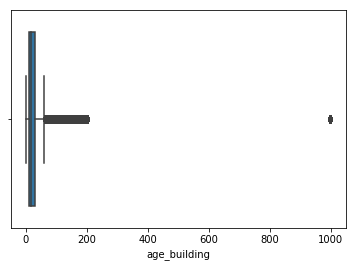

In [48]:
sns.boxplot(x=structure.age_building)

In [49]:
structure.loc[structure.age_building>400,'age_building']=100

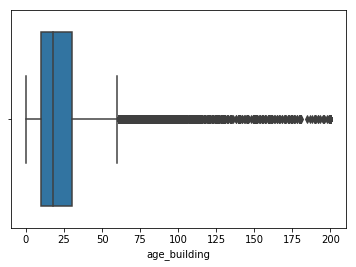

In [50]:
sns.boxplot(x=structure.age_building)

In [51]:
structure.age_building.isnull().sum()

0

In [52]:
structure.plinth_area_sq_ft.unique()

array([ 454,  324,  456, ..., 1349, 4242, 2247], dtype=int64)

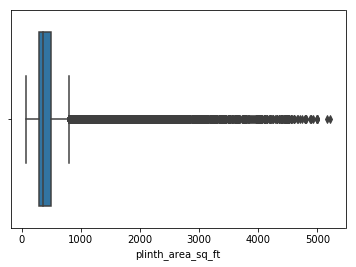

In [53]:
sns.boxplot(x=structure.plinth_area_sq_ft)

In [54]:
structure.height_ft_pre_eq.describe()

count    1.052948e+06
mean     1.630841e+01
std      5.808078e+00
min      6.000000e+00
25%      1.300000e+01
50%      1.600000e+01
75%      1.900000e+01
max      3.050000e+02
Name: height_ft_pre_eq, dtype: float64

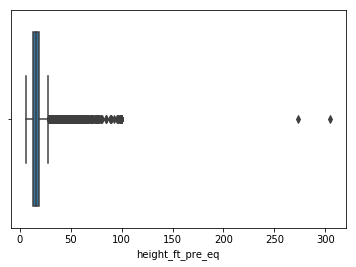

In [55]:
sns.boxplot(x=structure.height_ft_pre_eq)

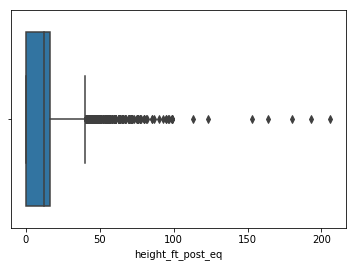

In [56]:
sns.boxplot(x=structure.height_ft_post_eq)

In [57]:
structure.loc[structure.height_ft_pre_eq>100,'height_ft_pre_eq']=50

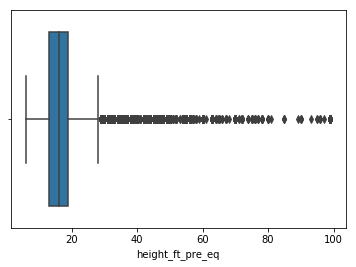

In [58]:
sns.boxplot(x=structure.height_ft_pre_eq)

In [59]:
structure.height_ft_post_eq.describe()

count    1.052948e+06
mean     1.038240e+01
std      8.648624e+00
min      0.000000e+00
25%      0.000000e+00
50%      1.200000e+01
75%      1.600000e+01
max      2.060000e+02
Name: height_ft_post_eq, dtype: float64

In [60]:
structure.loc[structure.height_ft_post_eq>100,'height_ft_post_eq']=50

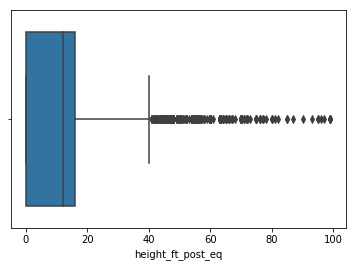

In [61]:
sns.boxplot(x=structure.height_ft_post_eq)

In [62]:
structure.land_surface_condition.isnull().sum()

0

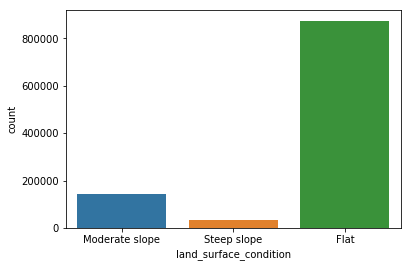

In [63]:
sns.countplot(x=structure.land_surface_condition)

In [64]:
structure.columns.tolist()

['building_id',
 'district_id',
 'vdcmun_id',
 'ward_id',
 'count_floors_pre_eq',
 'count_floors_post_eq',
 'age_building',
 'plinth_area_sq_ft',
 'height_ft_pre_eq',
 'height_ft_post_eq',
 'land_surface_condition',
 'foundation_type',
 'roof_type',
 'ground_floor_type',
 'other_floor_type',
 'position',
 'plan_configuration',
 'has_superstructure_adobe_mud',
 'has_superstructure_mud_mortar_stone',
 'has_superstructure_stone_flag',
 'has_superstructure_cement_mortar_stone',
 'has_superstructure_mud_mortar_brick',
 'has_superstructure_cement_mortar_brick',
 'has_superstructure_timber',
 'has_superstructure_bamboo',
 'has_superstructure_rc_non_engineered',
 'has_superstructure_rc_engineered',
 'has_superstructure_other',
 'condition_post_eq']

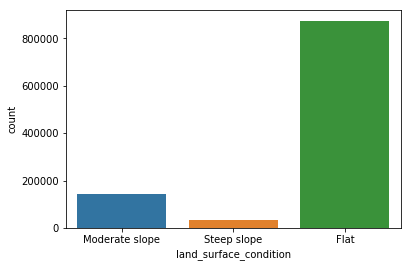

In [65]:
sns.countplot(x=structure.land_surface_condition)

In [66]:
structure.land_surface_condition=LabelEncoder().fit_transform(structure['land_surface_condition'])

In [67]:
structure.foundation_type=LabelEncoder().fit_transform(structure['foundation_type'])

In [68]:
flaw2=structure.foundation_type.value_counts()
flaw2

2    886331
0     60598
1     57354
4     42808
3      5857
Name: foundation_type, dtype: int64

In [69]:
structure.loc[structure.foundation_type==3,'foundation_type']=2

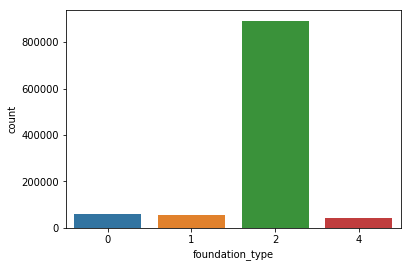

In [70]:
sns.countplot(x=structure.foundation_type)

In [71]:
structure.roof_type=LabelEncoder().fit_transform(structure['roof_type'])

In [72]:
flaw2=structure.roof_type.value_counts()
flaw2

1    739184
0    248235
2     65529
Name: roof_type, dtype: int64

In [73]:
structure.ground_floor_type=LabelEncoder().fit_transform(structure['ground_floor_type'])

In [74]:
flaw2=structure.ground_floor_type.value_counts()
flaw2

1    847250
0    100487
3     99046
4      4072
2      2093
Name: ground_floor_type, dtype: int64

In [75]:
structure.loc[structure.ground_floor_type==4,'ground_floor_type']=1
structure.loc[structure.ground_floor_type==2,'ground_floor_type']=1

In [76]:
flaw2=structure.ground_floor_type.value_counts()
flaw2

1    853415
0    100487
3     99046
Name: ground_floor_type, dtype: int64

In [77]:
structure.other_floor_type=LabelEncoder().fit_transform(structure['other_floor_type'])

In [78]:
flaw2=structure.other_floor_type.value_counts()
flaw2

2    666182
3    177571
0    160301
1     48894
Name: other_floor_type, dtype: int64

In [79]:
structure.position.unique()

array(['Attached-1 side', 'Not attached', 'Attached-2 side',
       'Attached-3 side', nan], dtype=object)

In [80]:
structure.position=structure.position.fillna('Not attached')

In [81]:
structure.position.unique()

array(['Attached-1 side', 'Not attached', 'Attached-2 side',
       'Attached-3 side'], dtype=object)

In [82]:
structure.position=LabelEncoder().fit_transform(structure['position'])

In [83]:
flaw2=structure.position.value_counts()
flaw2

3    816365
0    173459
1     53522
2      9602
Name: position, dtype: int64

In [84]:
structure.plan_configuration.unique()

array(['Rectangular', 'L-shape', 'Square', 'Others', 'T-shape', 'U-shape',
       'Multi-projected', 'Building with Central Courtyard', 'E-shape',
       'H-shape', nan], dtype=object)

In [85]:
structure.plan_configuration.describe()

count         1052947
unique             10
top       Rectangular
freq          1009987
Name: plan_configuration, dtype: object

In [86]:
structure.plan_configuration=structure.plan_configuration.fillna('Rectangular')

In [87]:
structure.plan_configuration.describe()

count         1052948
unique             10
top       Rectangular
freq          1009988
Name: plan_configuration, dtype: object

In [88]:
structure.plan_configuration=LabelEncoder().fit_transform(structure['plan_configuration'])

In [89]:
structure.plan_configuration.value_counts()

6    1009988
7      23106
3      15088
4       1412
8       1302
5        994
9        591
0        203
1        167
2         97
Name: plan_configuration, dtype: int64

In [90]:
structure.loc[structure.plan_configuration==2,'plan_configuration']=6
structure.loc[structure.plan_configuration==1,'plan_configuration']=6
structure.loc[structure.plan_configuration==0,'plan_configuration']=6
structure.loc[structure.plan_configuration==9,'plan_configuration']=6
structure.loc[structure.plan_configuration==5,'plan_configuration']=6
structure.loc[structure.plan_configuration==8,'plan_configuration']=6
structure.loc[structure.plan_configuration==4,'plan_configuration']=6


structure.plan_configuration.value_counts()




6    1014754
7      23106
3      15088
Name: plan_configuration, dtype: int64

In [91]:
structure.condition_post_eq.describe()

count              1052948
unique                   8
top       Damaged-Not used
freq                249464
Name: condition_post_eq, dtype: object

In [92]:
structure['condition_post_eq']=LabelEncoder().fit_transform(structure['condition_post_eq'])


In [93]:
structure.condition_post_eq.value_counts()

1    249464
2    211119
6    187480
5    145732
4    132508
7     71587
3     54587
0       471
Name: condition_post_eq, dtype: int64

In [94]:
structure.loc[structure.condition_post_eq==0,'condition_post_eq']=1

In [95]:
structure.condition_post_eq.value_counts()

1    249935
2    211119
6    187480
5    145732
4    132508
7     71587
3     54587
Name: condition_post_eq, dtype: int64

In [96]:
structure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1052948 entries, 0 to 1052947
Data columns (total 29 columns):
building_id                               1052948 non-null object
district_id                               1052948 non-null int64
vdcmun_id                                 1052948 non-null int64
ward_id                                   1052948 non-null int64
count_floors_pre_eq                       1052948 non-null int64
count_floors_post_eq                      1052948 non-null int64
age_building                              1052948 non-null int64
plinth_area_sq_ft                         1052948 non-null int64
height_ft_pre_eq                          1052948 non-null int64
height_ft_post_eq                         1052948 non-null int64
land_surface_condition                    1052948 non-null int64
foundation_type                           1052948 non-null int64
roof_type                                 1052948 non-null int64
ground_floor_type                        

In [97]:
buil_owner.columns.tolist()

['building_id',
 'district_id',
 'vdcmun_id',
 'ward_id',
 'legal_ownership_status',
 'count_families',
 'has_secondary_use',
 'has_secondary_use_agriculture',
 'has_secondary_use_hotel',
 'has_secondary_use_rental',
 'has_secondary_use_institution',
 'has_secondary_use_school',
 'has_secondary_use_industry',
 'has_secondary_use_health_post',
 'has_secondary_use_gov_office',
 'has_secondary_use_use_police',
 'has_secondary_use_other']

In [98]:
buil_owner['district_id']=LabelEncoder().fit_transform(buil_owner['district_id'])

In [99]:
buil_owner['vdcmun_id']=LabelEncoder().fit_transform(buil_owner['vdcmun_id'])

In [100]:
buil_owner

,building_id,district_id,vdcmun_id,ward_id,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,a3380c4f75,0,0,70102,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
1,a3380c4fd9,0,0,70102,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
2,a3380c503e,0,0,70102,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
3,a338a4e5f2,0,0,70103,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
4,a338a4e653,0,0,70103,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
5,a338a4e6b7,0,0,70103,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
6,a338a4e71f,0,0,70103,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
7,a339d612f3,0,0,70105,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
8,a339d61353,0,0,70105,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
9,a339d613bb,0,0,70105,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0


In [101]:
buil_owner['ward_id']=LabelEncoder().fit_transform(buil_owner['ward_id'])

In [102]:
buil_owner.legal_ownership_status.value_counts()

Private          1014042
Public             22326
Institutional      10502
Other               6078
Name: legal_ownership_status, dtype: int64

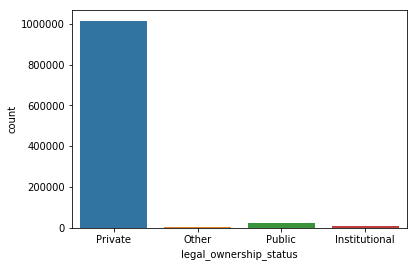

In [103]:
sns.countplot(x=buil_owner.legal_ownership_status)

In [105]:
buil_owner.legal_ownership_status.value_counts()

2    1014042
3      22326
0      10502
1       6078
Name: legal_ownership_status, dtype: int64

In [106]:
buil_owner.loc[buil_owner.legal_ownership_status==0,'legal_ownership_status']=4
buil_owner.loc[buil_owner.legal_ownership_status==3,'legal_ownership_status']=4
buil_owner.loc[buil_owner.legal_ownership_status==1,'legal_ownership_status']=4
buil_owner.legal_ownership_status.value_counts()

2    1014042
4      38906
Name: legal_ownership_status, dtype: int64

In [107]:
buil_owner.count_families.describe()

count    1.052946e+06
mean     9.844455e-01
std      4.197848e-01
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.100000e+01
Name: count_families, dtype: float64

In [108]:
buil_owner.count_families=buil_owner.count_families.fillna(1.0)

In [109]:
buil_owner.count_families.value_counts()

1.0     913106
0.0      84304
2.0      46246
3.0       7075
4.0       1618
5.0        413
6.0        128
7.0         33
8.0         16
9.0          8
11.0         1
Name: count_families, dtype: int64

In [110]:
buil_owner['count_families']=buil_owner['count_families'].astype(int)
buil_owner.count_families.value_counts()

1     913106
0      84304
2      46246
3       7075
4       1618
5        413
6        128
7         33
8         16
9          8
11         1
Name: count_families, dtype: int64

In [111]:
buil_owner.loc[buil_owner.count_families==11,'count_families']=4
buil_owner.loc[buil_owner.count_families==9,'count_families']=4
buil_owner.loc[buil_owner.count_families==8,'count_families']=4
buil_owner.loc[buil_owner.count_families==7,'count_families']=4
buil_owner.loc[buil_owner.count_families==6,'count_families']=4
buil_owner.loc[buil_owner.count_families==5,'count_families']=4
buil_owner.loc[buil_owner.count_families==4,'count_families']=3
buil_owner.count_families.value_counts()




1    913106
0     84304
2     46246
3      9292
Name: count_families, dtype: int64

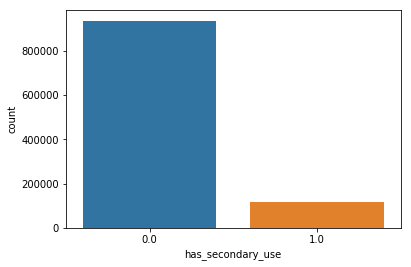

In [112]:
sns.countplot(x=buil_owner.has_secondary_use)

In [113]:
buil_owner['has_secondary_use']=buil_owner.has_secondary_use.fillna(0.0)

In [114]:
buil_owner.has_secondary_use_other.describe()

count    1.052948e+06
mean     5.106615e-03
std      7.127792e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: has_secondary_use_other, dtype: float64

In [115]:
buil_owner.has_secondary_use.value_counts()

0.0    934849
1.0    118099
Name: has_secondary_use, dtype: int64

In [116]:
buil_owner.has_secondary_use=buil_owner.has_secondary_use.astype(int)

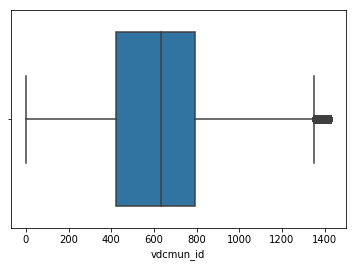

In [117]:
sns.boxplot(x=buil_owner.vdcmun_id)

In [118]:
buil_owner=buil_owner.drop(['district_id'],axis=1)
buil_owner=buil_owner.drop(['ward_id'],axis=1)
buil_owner=buil_owner.drop(['vdcmun_id'],axis=1)

In [119]:
buil_owner.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1052948 entries, 0 to 1052947
Data columns (total 14 columns):
building_id                      1052948 non-null object
legal_ownership_status           1052948 non-null int64
count_families                   1052948 non-null int32
has_secondary_use                1052948 non-null int32
has_secondary_use_agriculture    1052948 non-null int64
has_secondary_use_hotel          1052948 non-null int64
has_secondary_use_rental         1052948 non-null int64
has_secondary_use_institution    1052948 non-null int64
has_secondary_use_school         1052948 non-null int64
has_secondary_use_industry       1052948 non-null int64
has_secondary_use_health_post    1052948 non-null int64
has_secondary_use_gov_office     1052948 non-null int64
has_secondary_use_use_police     1052948 non-null int64
has_secondary_use_other          1052948 non-null int64
dtypes: int32(2), int64(11), object(1)
memory usage: 104.4+ MB


In [120]:
zzzz=pd.merge(structure,buil_owner,on='building_id')

In [121]:
train.area_assesed.unique()

array(['Both', 'Building removed', 'Exterior', 'Not able to inspect',
       'Interior'], dtype=object)

In [122]:
train.area_assesed.value_counts()

Both                   382992
Building removed       131346
Exterior                99030
Not able to inspect     16575
Interior                 1818
Name: area_assesed, dtype: int64

In [123]:
train['area_assesed']=LabelEncoder().fit_transform(train.area_assesed)

In [124]:
train.area_assesed.value_counts()

0    382992
1    131346
2     99030
4     16575
3      1818
Name: area_assesed, dtype: int64

In [125]:
train.loc[train.area_assesed==3,'area_assesed']=0

In [126]:
train.area_assesed.value_counts()

0    384810
1    131346
2     99030
4     16575
Name: area_assesed, dtype: int64

In [127]:
zzzz=zzzz.drop(['district_id'],axis=1)


In [128]:
zzzz=zzzz.drop(['vdcmun_id'],axis=1)

In [129]:
zzzz


,building_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,a3380c4f75,0,1,1,28,454,9,9,1,2,...,0,0,0,0,0,0,0,0,0,0
1,a3380c4fd9,0,1,1,32,324,9,9,1,2,...,0,0,0,0,0,0,0,0,0,0
2,a3380c503e,0,2,2,34,456,18,18,1,2,...,0,0,0,0,0,0,0,0,0,0
3,a338a4e5f2,1,2,2,20,452,18,18,1,2,...,0,0,0,0,0,0,0,0,0,0
4,a338a4e653,1,1,0,25,542,9,0,1,2,...,0,0,0,0,0,0,0,0,0,0
5,a338a4e6b7,1,2,0,35,589,18,0,1,2,...,0,0,0,0,0,0,0,0,0,0
6,a338a4e71f,1,1,1,44,546,9,9,1,2,...,0,0,0,0,0,0,0,0,0,0
7,a339d612f3,2,1,1,25,324,9,9,1,2,...,0,0,0,0,0,0,0,0,0,0
8,a339d61353,2,2,0,24,548,18,0,1,2,...,0,0,0,0,0,0,0,0,0,0
9,a339d613bb,2,2,0,27,574,18,0,1,2,...,0,0,0,0,0,0,0,0,0,0


In [130]:
train.has_geotechnical_risk=train.has_geotechnical_risk.astype(int)


In [131]:
train.has_geotechnical_risk.value_counts()

0    553473
1     78288
Name: has_geotechnical_risk, dtype: int64

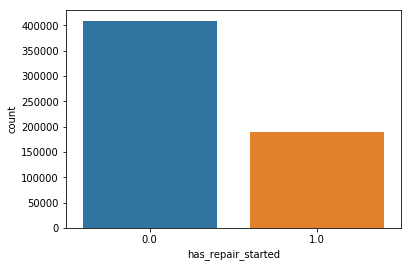

In [132]:
sns.countplot(x=train.has_repair_started)


In [133]:
train['district_id']=LabelEncoder().fit_transform(train['district_id'])
train['vdcmun_id']=LabelEncoder().fit_transform(train['vdcmun_id'])

In [134]:
train.has_repair_started.isnull().sum()

33417

In [135]:
train.has_repair_started.value_counts()

0.0    409222
1.0    189122
Name: has_repair_started, dtype: int64

In [136]:
train['has_repair_started']=train['has_repair_started'].ffill()

In [137]:
train.has_repair_started.value_counts()

0.0    432216
1.0    199545
Name: has_repair_started, dtype: int64

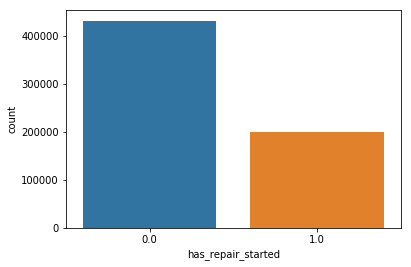

In [138]:
sns.countplot(x=train.has_repair_started)

In [139]:
train['has_repair_started']=train['has_repair_started'].astype(int)

In [140]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631761 entries, 0 to 631760
Data columns (total 14 columns):
area_assesed                             631761 non-null int64
building_id                              631761 non-null object
damage_grade                             631761 non-null object
district_id                              631761 non-null int64
has_geotechnical_risk                    631761 non-null int32
has_geotechnical_risk_fault_crack        631761 non-null int64
has_geotechnical_risk_flood              631761 non-null int64
has_geotechnical_risk_land_settlement    631761 non-null int64
has_geotechnical_risk_landslide          631761 non-null int64
has_geotechnical_risk_liquefaction       631761 non-null int64
has_geotechnical_risk_other              631761 non-null int64
has_geotechnical_risk_rock_fall          631761 non-null int64
has_repair_started                       631761 non-null int32
vdcmun_id                                631761 non-null int64
dtype

In [141]:
final=pd.merge(train,zzzz,on='building_id')

In [142]:
final

,area_assesed,building_id,damage_grade,district_id,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,0,24385bfd2a2,Grade 4,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,405d1bbebbf,Grade 2,25,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,351d9bc71f6,Grade 1,19,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,2be3a971166,Grade 5,16,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,34c7d073ea6,Grade 3,19,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,1f54965821f,Grade 5,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,2beb42eaeee,Grade 2,16,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,0,25e8adfd09a,Grade 5,12,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1e96b58fa58,Grade 1,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,392cbd772c9,Grade 3,22,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [143]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 631761 entries, 0 to 631760
Data columns (total 53 columns):
area_assesed                              631761 non-null int64
building_id                               631761 non-null object
damage_grade                              631761 non-null object
district_id                               631761 non-null int64
has_geotechnical_risk                     631761 non-null int32
has_geotechnical_risk_fault_crack         631761 non-null int64
has_geotechnical_risk_flood               631761 non-null int64
has_geotechnical_risk_land_settlement     631761 non-null int64
has_geotechnical_risk_landslide           631761 non-null int64
has_geotechnical_risk_liquefaction        631761 non-null int64
has_geotechnical_risk_other               631761 non-null int64
has_geotechnical_risk_rock_fall           631761 non-null int64
has_repair_started                        631761 non-null int32
vdcmun_id                                 631761 non-nu

In [144]:
test

,area_assesed,building_id,district_id,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,has_repair_started,vdcmun_id
0,Both,a3380c4f75,7,0.0,0,0,0,0,0,0,0,1.0,701
1,Both,a338a4e653,7,0.0,0,0,0,0,0,0,0,1.0,701
2,Building removed,a338a4e6b7,7,0.0,0,0,0,0,0,0,0,1.0,701
3,Both,a33a6eaa3a,7,0.0,0,0,0,0,0,0,0,1.0,701
4,Building removed,a33b073ff6,7,0.0,0,0,0,0,0,0,0,1.0,701
5,Both,6604e4896c6,7,0.0,0,0,0,0,0,0,0,0.0,701
6,Both,a33b07430f,7,0.0,0,0,0,0,0,0,0,1.0,701
7,Building removed,a33c386cf3,7,0.0,0,0,0,0,0,0,0,1.0,701
8,Both,a33c386ee7,7,0.0,0,0,0,0,0,0,0,1.0,701
9,Both,a33c38700f,7,0.0,0,0,0,0,0,0,0,1.0,701


In [145]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421175 entries, 0 to 421174
Data columns (total 13 columns):
area_assesed                             421175 non-null object
building_id                              421175 non-null object
district_id                              421175 non-null int64
has_geotechnical_risk                    421175 non-null float64
has_geotechnical_risk_fault_crack        421175 non-null int64
has_geotechnical_risk_flood              421175 non-null int64
has_geotechnical_risk_land_settlement    421175 non-null int64
has_geotechnical_risk_landslide          421175 non-null int64
has_geotechnical_risk_liquefaction       421175 non-null int64
has_geotechnical_risk_other              421175 non-null int64
has_geotechnical_risk_rock_fall          421175 non-null int64
has_repair_started                       399253 non-null float64
vdcmun_id                                421175 non-null int64
dtypes: float64(2), int64(9), object(2)
memory usage: 41.8+ MB


In [146]:
test.area_assesed=LabelEncoder().fit_transform(test['area_assesed'])

In [147]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421175 entries, 0 to 421174
Data columns (total 13 columns):
area_assesed                             421175 non-null int64
building_id                              421175 non-null object
district_id                              421175 non-null int64
has_geotechnical_risk                    421175 non-null float64
has_geotechnical_risk_fault_crack        421175 non-null int64
has_geotechnical_risk_flood              421175 non-null int64
has_geotechnical_risk_land_settlement    421175 non-null int64
has_geotechnical_risk_landslide          421175 non-null int64
has_geotechnical_risk_liquefaction       421175 non-null int64
has_geotechnical_risk_other              421175 non-null int64
has_geotechnical_risk_rock_fall          421175 non-null int64
has_repair_started                       399253 non-null float64
vdcmun_id                                421175 non-null int64
dtypes: float64(2), int64(10), object(1)
memory usage: 41.8+ MB


In [148]:
test['has_geotechnical_risk']=test['has_geotechnical_risk'].astype(int)

In [149]:
test.has_repair_started.unique()

array([  1.,   0.,  nan])

In [150]:
test['has_repair_started']=test['has_repair_started'].ffill()

In [151]:
test.has_repair_started.describe()

count    421175.000000
mean          0.319782
std           0.466392
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: has_repair_started, dtype: float64

In [152]:
final.shape

(631761, 53)

In [153]:
test.shape

(421175, 13)

In [154]:
zeta=final

In [155]:
fest=zeta['damage_grade']

In [156]:
zeta['damage_grade']=LabelEncoder().fit_transform(zeta['damage_grade'])

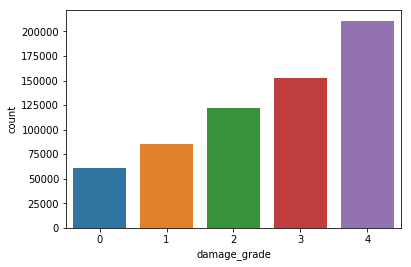

In [157]:
sns.countplot(x=zeta.damage_grade)

In [158]:
numeric_features = zeta.select_dtypes(include=[np.number])
numeric_features.dtypes

area_assesed                              int64
damage_grade                              int64
district_id                               int64
has_geotechnical_risk                     int32
has_geotechnical_risk_fault_crack         int64
has_geotechnical_risk_flood               int64
has_geotechnical_risk_land_settlement     int64
has_geotechnical_risk_landslide           int64
has_geotechnical_risk_liquefaction        int64
has_geotechnical_risk_other               int64
has_geotechnical_risk_rock_fall           int64
has_repair_started                        int32
vdcmun_id                                 int64
ward_id                                   int64
count_floors_pre_eq                       int64
count_floors_post_eq                      int64
age_building                              int64
plinth_area_sq_ft                         int64
height_ft_pre_eq                          int64
height_ft_post_eq                         int64
land_surface_condition                  

In [159]:
corr = numeric_features.corr()

print (corr['damage_grade'].sort_values(ascending=False)[:20], '\n')
print (corr['damage_grade'].sort_values(ascending=False)[-20:])

damage_grade                             1.000000
area_assesed                             0.451495
has_superstructure_mud_mortar_stone      0.314609
other_floor_type                         0.221498
age_building                             0.186567
count_floors_pre_eq                      0.175848
has_geotechnical_risk_fault_crack        0.098152
has_superstructure_adobe_mud             0.087013
has_geotechnical_risk                    0.086293
height_ft_pre_eq                         0.079180
count_families                           0.071019
has_geotechnical_risk_landslide          0.063065
has_geotechnical_risk_rock_fall          0.058279
plan_configuration                       0.058225
has_geotechnical_risk_land_settlement    0.057551
has_superstructure_stone_flag            0.056319
has_superstructure_mud_mortar_brick      0.049749
has_secondary_use_agriculture            0.026161
land_surface_condition                   0.023783
foundation_type                          0.016251


In [160]:
test.columns.tolist()

['area_assesed',
 'building_id',
 'district_id',
 'has_geotechnical_risk',
 'has_geotechnical_risk_fault_crack',
 'has_geotechnical_risk_flood',
 'has_geotechnical_risk_land_settlement',
 'has_geotechnical_risk_landslide',
 'has_geotechnical_risk_liquefaction',
 'has_geotechnical_risk_other',
 'has_geotechnical_risk_rock_fall',
 'has_repair_started',
 'vdcmun_id']

In [161]:
zeta.columns.tolist()

['area_assesed',
 'building_id',
 'damage_grade',
 'district_id',
 'has_geotechnical_risk',
 'has_geotechnical_risk_fault_crack',
 'has_geotechnical_risk_flood',
 'has_geotechnical_risk_land_settlement',
 'has_geotechnical_risk_landslide',
 'has_geotechnical_risk_liquefaction',
 'has_geotechnical_risk_other',
 'has_geotechnical_risk_rock_fall',
 'has_repair_started',
 'vdcmun_id',
 'ward_id',
 'count_floors_pre_eq',
 'count_floors_post_eq',
 'age_building',
 'plinth_area_sq_ft',
 'height_ft_pre_eq',
 'height_ft_post_eq',
 'land_surface_condition',
 'foundation_type',
 'roof_type',
 'ground_floor_type',
 'other_floor_type',
 'position',
 'plan_configuration',
 'has_superstructure_adobe_mud',
 'has_superstructure_mud_mortar_stone',
 'has_superstructure_stone_flag',
 'has_superstructure_cement_mortar_stone',
 'has_superstructure_mud_mortar_brick',
 'has_superstructure_cement_mortar_brick',
 'has_superstructure_timber',
 'has_superstructure_bamboo',
 'has_superstructure_rc_non_engineered',

In [162]:
train_Y=(zeta['damage_grade'])

In [163]:
testo=pd.merge(test,zzzz,on='building_id')

In [164]:
testo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421175 entries, 0 to 421174
Data columns (total 52 columns):
area_assesed                              421175 non-null int64
building_id                               421175 non-null object
district_id                               421175 non-null int64
has_geotechnical_risk                     421175 non-null int32
has_geotechnical_risk_fault_crack         421175 non-null int64
has_geotechnical_risk_flood               421175 non-null int64
has_geotechnical_risk_land_settlement     421175 non-null int64
has_geotechnical_risk_landslide           421175 non-null int64
has_geotechnical_risk_liquefaction        421175 non-null int64
has_geotechnical_risk_other               421175 non-null int64
has_geotechnical_risk_rock_fall           421175 non-null int64
has_repair_started                        421175 non-null float64
vdcmun_id                                 421175 non-null int64
ward_id                                   421175 non-n

In [165]:
testo['has_repair_started']=testo['has_repair_started'].astype(int)

In [166]:
zeta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 631761 entries, 0 to 631760
Data columns (total 53 columns):
area_assesed                              631761 non-null int64
building_id                               631761 non-null object
damage_grade                              631761 non-null int64
district_id                               631761 non-null int64
has_geotechnical_risk                     631761 non-null int32
has_geotechnical_risk_fault_crack         631761 non-null int64
has_geotechnical_risk_flood               631761 non-null int64
has_geotechnical_risk_land_settlement     631761 non-null int64
has_geotechnical_risk_landslide           631761 non-null int64
has_geotechnical_risk_liquefaction        631761 non-null int64
has_geotechnical_risk_other               631761 non-null int64
has_geotechnical_risk_rock_fall           631761 non-null int64
has_repair_started                        631761 non-null int32
vdcmun_id                                 631761 non-nul

In [167]:
testo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421175 entries, 0 to 421174
Data columns (total 52 columns):
area_assesed                              421175 non-null int64
building_id                               421175 non-null object
district_id                               421175 non-null int64
has_geotechnical_risk                     421175 non-null int32
has_geotechnical_risk_fault_crack         421175 non-null int64
has_geotechnical_risk_flood               421175 non-null int64
has_geotechnical_risk_land_settlement     421175 non-null int64
has_geotechnical_risk_landslide           421175 non-null int64
has_geotechnical_risk_liquefaction        421175 non-null int64
has_geotechnical_risk_other               421175 non-null int64
has_geotechnical_risk_rock_fall           421175 non-null int64
has_repair_started                        421175 non-null int32
vdcmun_id                                 421175 non-null int64
ward_id                                   421175 non-nul

In [168]:
from scipy.stats import spearmanr
label=[]
values=[]
for col in zeta.columns:
    if col not in ['building_id','damage_grade']:
        label.append(col)
        values.append(spearmanr(zeta[col].values,zeta['damage_grade'].values)[0])
corr=pd.DataFrame({'col_labels':label,'corr_values':values})
corr=corr.sort_values(by='corr_values')


In [169]:
corr


,col_labels,corr_values
14,count_floors_post_eq,-0.683725
18,height_ft_post_eq,-0.677453
31,has_superstructure_cement_mortar_brick,-0.275783
22,ground_floor_type,-0.230563
10,has_repair_started,-0.225618
21,roof_type,-0.181777
34,has_superstructure_rc_non_engineered,-0.174298
35,has_superstructure_rc_engineered,-0.171482
16,plinth_area_sq_ft,-0.113141
42,has_secondary_use_hotel,-0.105152


In [170]:
 columns_to_use=corr[(corr['corr_values']>0.066) | (corr['corr_values']<-0.094)].col_labels.tolist()

In [171]:
columns_to_use

['count_floors_post_eq',
 'height_ft_post_eq',
 'has_superstructure_cement_mortar_brick',
 'ground_floor_type',
 'has_repair_started',
 'roof_type',
 'has_superstructure_rc_non_engineered',
 'has_superstructure_rc_engineered',
 'plinth_area_sq_ft',
 'has_secondary_use_hotel',
 'district_id',
 'vdcmun_id',
 'ward_id',
 'has_geotechnical_risk_landslide',
 'count_families',
 'has_superstructure_adobe_mud',
 'foundation_type',
 'has_geotechnical_risk',
 'has_geotechnical_risk_fault_crack',
 'height_ft_pre_eq',
 'count_floors_pre_eq',
 'other_floor_type',
 'age_building',
 'has_superstructure_mud_mortar_stone',
 'area_assesed']

In [172]:
corr=corr.reset_index()

In [173]:
corr

,index,col_labels,corr_values
0,14,count_floors_post_eq,-0.683725
1,18,height_ft_post_eq,-0.677453
2,31,has_superstructure_cement_mortar_brick,-0.275783
3,22,ground_floor_type,-0.230563
4,10,has_repair_started,-0.225618
5,21,roof_type,-0.181777
6,34,has_superstructure_rc_non_engineered,-0.174298
7,35,has_superstructure_rc_engineered,-0.171482
8,16,plinth_area_sq_ft,-0.113141
9,42,has_secondary_use_hotel,-0.105152


In [174]:
columns_to_use

['count_floors_post_eq',
 'height_ft_post_eq',
 'has_superstructure_cement_mortar_brick',
 'ground_floor_type',
 'has_repair_started',
 'roof_type',
 'has_superstructure_rc_non_engineered',
 'has_superstructure_rc_engineered',
 'plinth_area_sq_ft',
 'has_secondary_use_hotel',
 'district_id',
 'vdcmun_id',
 'ward_id',
 'has_geotechnical_risk_landslide',
 'count_families',
 'has_superstructure_adobe_mud',
 'foundation_type',
 'has_geotechnical_risk',
 'has_geotechnical_risk_fault_crack',
 'height_ft_pre_eq',
 'count_floors_pre_eq',
 'other_floor_type',
 'age_building',
 'has_superstructure_mud_mortar_stone',
 'area_assesed']

In [175]:
for col in zeta.columns:
    if col not in columns_to_use:
        del zeta[col]

In [176]:
zeta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 631761 entries, 0 to 631760
Data columns (total 25 columns):
area_assesed                              631761 non-null int64
district_id                               631761 non-null int64
has_geotechnical_risk                     631761 non-null int32
has_geotechnical_risk_fault_crack         631761 non-null int64
has_geotechnical_risk_landslide           631761 non-null int64
has_repair_started                        631761 non-null int32
vdcmun_id                                 631761 non-null int64
ward_id                                   631761 non-null int64
count_floors_pre_eq                       631761 non-null int64
count_floors_post_eq                      631761 non-null int64
age_building                              631761 non-null int64
plinth_area_sq_ft                         631761 non-null int64
height_ft_pre_eq                          631761 non-null int64
height_ft_post_eq                         631761 non-null

In [177]:
testo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421175 entries, 0 to 421174
Data columns (total 52 columns):
area_assesed                              421175 non-null int64
building_id                               421175 non-null object
district_id                               421175 non-null int64
has_geotechnical_risk                     421175 non-null int32
has_geotechnical_risk_fault_crack         421175 non-null int64
has_geotechnical_risk_flood               421175 non-null int64
has_geotechnical_risk_land_settlement     421175 non-null int64
has_geotechnical_risk_landslide           421175 non-null int64
has_geotechnical_risk_liquefaction        421175 non-null int64
has_geotechnical_risk_other               421175 non-null int64
has_geotechnical_risk_rock_fall           421175 non-null int64
has_repair_started                        421175 non-null int32
vdcmun_id                                 421175 non-null int64
ward_id                                   421175 non-nul

In [178]:
train1=zeta

In [179]:
train1

,area_assesed,district_id,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_landslide,has_repair_started,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,...,roof_type,ground_floor_type,other_floor_type,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_cement_mortar_brick,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,count_families,has_secondary_use_hotel
0,0,10,0,0,0,0,601,5398,3,3,...,1,1,2,1,0,0,0,0,2,0
1,0,25,0,0,0,1,1131,10369,3,3,...,1,0,2,0,1,0,0,0,1,1
2,0,19,0,0,0,0,885,8206,3,3,...,2,3,1,0,0,0,0,1,1,0
3,1,16,0,0,0,0,741,6853,3,0,...,1,1,3,0,1,0,0,0,1,0
4,0,19,0,0,0,0,862,7997,2,2,...,0,1,2,0,1,0,0,0,1,0
5,2,7,0,0,0,0,379,3389,3,0,...,0,1,2,0,1,0,0,0,0,0
6,0,16,1,0,1,0,743,6875,1,1,...,1,0,0,0,0,0,0,0,1,0
7,0,12,0,0,0,0,631,5728,3,0,...,1,0,3,1,1,0,1,0,1,0
8,0,7,0,0,0,0,328,2933,2,2,...,2,3,1,0,0,1,0,1,1,0
9,0,22,0,0,0,1,1010,9364,2,2,...,1,1,2,0,1,0,0,0,1,0


In [180]:
train_Y

0         3
1         1
2         0
3         4
4         2
5         4
6         1
7         4
8         0
9         2
10        4
11        3
12        1
13        4
14        1
15        4
16        3
17        2
18        3
19        2
20        3
21        3
22        3
23        4
24        3
25        2
26        4
27        4
28        4
29        4
         ..
631731    2
631732    3
631733    3
631734    4
631735    4
631736    2
631737    4
631738    4
631739    1
631740    2
631741    2
631742    4
631743    4
631744    4
631745    4
631746    4
631747    1
631748    3
631749    4
631750    4
631751    4
631752    4
631753    3
631754    2
631755    0
631756    3
631757    4
631758    1
631759    3
631760    1
Name: damage_grade, Length: 631761, dtype: int64

In [181]:
test_id=testo.building_id

In [182]:
for col in testo.columns:
    if col not in columns_to_use:
        del testo[col]

In [183]:
testo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421175 entries, 0 to 421174
Data columns (total 25 columns):
area_assesed                              421175 non-null int64
district_id                               421175 non-null int64
has_geotechnical_risk                     421175 non-null int32
has_geotechnical_risk_fault_crack         421175 non-null int64
has_geotechnical_risk_landslide           421175 non-null int64
has_repair_started                        421175 non-null int32
vdcmun_id                                 421175 non-null int64
ward_id                                   421175 non-null int64
count_floors_pre_eq                       421175 non-null int64
count_floors_post_eq                      421175 non-null int64
age_building                              421175 non-null int64
plinth_area_sq_ft                         421175 non-null int64
height_ft_pre_eq                          421175 non-null int64
height_ft_post_eq                         421175 non-null

In [184]:
train_X=train1

In [185]:
train_Y.shape

(631761,)

In [186]:
test_X=testo

In [187]:
X=train_X
Y=train_Y
test_X=testo

In [188]:
X_train,X_test,y_train,y_test=train_test_split(train_X,train_Y,test_size=0.3,random_state=0)


In [189]:
from sklearn.ensemble import  RandomForestRegressor

In [190]:
model =  RandomForestRegressor(n_estimators= 100,max_features="auto",min_samples_leaf=3,max_depth=100,oob_score = False, random_state =42)
model.fit(X_train, y_train)
y_pred1 = model.predict(X_test)
predictions = [round(value) for value in y_pred1]
accuracy = accuracy_score(y_test, predictions)  
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 70.04%


In [191]:
model =  RandomForestRegressor(n_estimators= 100,max_features="auto",min_samples_leaf=3,max_depth=100,oob_score = False, random_state =158)
model.fit(train_X, train_Y)
y_pred1 = model.predict(test_X)
predictions = [round(value) for value in y_pred1]


sub2 = pd.DataFrame({
    "building_id":test_id,
    "damage_grade":predictions
})
sub2['damage_grade']=sub2['damage_grade'].astype(int)

dam2=sub2['damage_grade']



for n,i in enumerate(dam2):
    if i==0:
        dam2[n]='Grade 1'
    elif i==1:
        dam2[n]='Grade 2'
    elif i==2:
        dam2[n]='Grade 3'
    elif i==3:
        dam2[n]='Grade 4'
    elif i==4:
        dam2[n]='Grade 5'
        
        
sub2.to_csv('submission2.csv',index=False)


C:\Users\piyush\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\piyush\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
